In [10]:
# importation des packages
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy
%matplotlib inline

In [11]:
def func(x): # Fonction Objective (Fonction Booth's)
    return (x[1] - (5.1/(4*au.pi**2))*x[0]**2 + (5/au.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*au.pi))*au.cos(x[0]) + 10
#(x[1] - (5.1/(4*au.pi**2))*x[0]**2 + (5/au.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*au.pi))*au.cos(x[0]) + 10
#3*(x[0])**2 + (x[1])**2 + 2*x[0]*x[1] - x[0] + x[1]
#(x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2

Df = grad(func) # Le Gradient de la fonction objective

Text(0, 0.5, '$x_2$ ->')

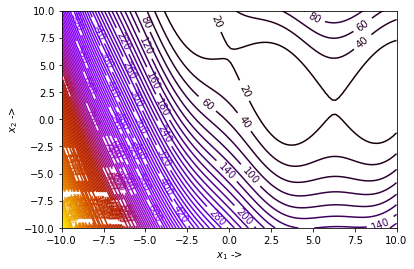

In [12]:
from scipy.optimize import line_search
NORM = np.linalg.norm

# dessinez d'abord le tracé de contour
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")

In [13]:
# definition de la fonction DFP()

def DFP(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    fi = [func(Xj)]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Sélection du sens de la descente la plus raide
        
        start_point = Xj # Point de départ pour la sélection de la longueur de pas 
        beta = line_search(f=func, myfprime=Df, xk=start_point, 
                           pk=delta, c1=alpha_1, c2=alpha_2)[0] # Sélection de la longueur du pas
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            fi += [func(X), ]
            print("Les valeurs de x1 : {}".format(x1))
            print("Les valeurs de x2 : {}".format(x2))
            print("Les valeurs de f(x) : {}".format(fi))
            plt.plot(x1, x2, "rx-", ms=5.5) # Tracer les données finales collectées montrant la trajectoire d'optimisation
            y1 = np.linspace(-10, 10, 100)
            y2 = np.linspace(-10, 10, 100)
            z = np.zeros(([len(y1), len(y2)]))
            for i in range(0, len(y1)):
                for j in range(0, len(y2)):
                    z[j, i] = func([y1[i], y2[j]])
            contours=plt.contour(y1, y2, z, 100, cmap=plt.cm.gnuplot)
            plt.clabel(contours, inline=1, fontsize=10)
            plt.xlabel("$y_1$ ->")
            plt.ylabel("$y_2$ ->")
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad 
            w1 = Dj 
            w2 = Bf.dot(Gj) 
            w1T = w1.T
            w2T = w2.T
            sigma1 = 1/(w1T.dot(Gj)) 
            sigma2 = -1/(w2T.dot(Gj)) 
            W1 = np.outer(w1, w1)
            W2 = np.outer(w2, w2)
            Delta = sigma1*W1 + sigma2*W2 
            Bf += Delta 
            Xj = X # Mise à jour vers la nouvelle itération
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]  
            fi += [func(Xj), ]

Les valeurs de x1 : [-7.8, 10.393077508531729, 9.68109367167697, 9.60075850724375, 9.4402636087953, 9.42779174762867, 9.424788654148259, 9.42477789236182]
Les valeurs de x2 : [-3.75, 1.527713096061369, 3.2913342918528716, 2.8920618550574906, 2.456415715423818, 2.469397971261257, 2.4750154472582535, 2.474999813894197]
Les valeurs de f(x) : [911.9389121960172, 8.112418326644555, 1.06162005486304, 0.6162112597886722, 0.4000421324121284, 0.39799731272830385, 0.3978873583200375, 0.39788735772977724]


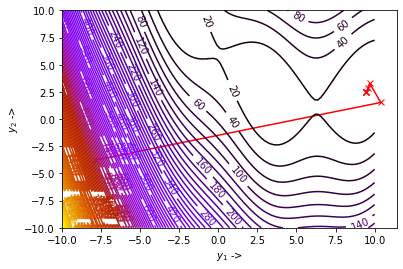

(array([9.42477789, 2.47499981]), 0.39788735772977724)

In [14]:
DFP(np.array([-7.8, -3.75]), 10**-5, 10**-4, 3.82)